# Part 2.7: Supervised Learning - Support Vector Regression (SVR)

Support Vector Regression (SVR) is the regression counterpart to Support Vector Machines (SVM). The key idea is different from other regression models. Instead of trying to minimize the error between the prediction and the data, SVR tries to fit as many data points as possible within a certain margin or 'street' while limiting margin violations.

### The Epsilon-Insensitive Tube
SVR is defined by a parameter, epsilon (ε). This epsilon defines a tube or margin around the regression line. Any data points that fall *inside* this tube are not considered in the loss function. Only the points outside the tube (the 'support vectors') contribute to the error and influence the model's fit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Generate some data
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1

# SVR is sensitive to feature scales, so scaling is important
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

### SVR with Kernels
Just like SVMs for classification, SVR can use kernels (e.g., 'linear', 'poly', 'rbf') to model non-linear relationships.

In [2]:
# Fit an SVR model with an RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_scaled, y_scaled)

,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### Visualizing the SVR Fit

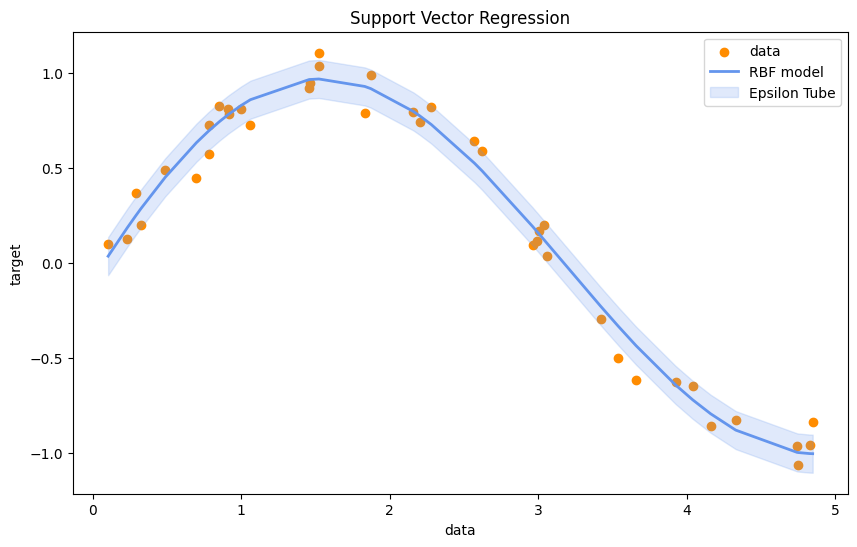

In [3]:
# Make predictions
y_pred_scaled = svr_rbf.predict(X_scaled)

# Inverse transform to get back to original scale for plotting
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X, y_pred, color='cornflowerblue', lw=2, label='RBF model')

# Plot the epsilon tube
plt.fill_between(X.ravel(), y_pred - svr_rbf.epsilon, y_pred + svr_rbf.epsilon, 
                 color='cornflowerblue', alpha=0.2, label='Epsilon Tube')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()